In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
ACS_TAPP_16_1YR_Est = pd.read_csv('ACS_TAPP_16_1YR_Est.csv', sep=",",thousands=',')
ACS_TAPP_16_1YR_Est = ACS_TAPP_16_1YR_Est.iloc[:, 2:]
ACS_TAPP_16_1YR_Est = ACS_TAPP_16_1YR_Est.set_index('STATE')
ACS_TAPP_16_1YR_Est

Estimate; HOUSEHOLDS BY TYPE - Total households  \
STATE                                                                      
Alabama_16                                                       1852518   
Alaska_16                                                         248468   
Arizona_16                                                       2519052   
Arkansas_16                                                      1142718   
California_16                                                   12944178   
Colorado_16                                                      2108992   
Connecticut_16                                                   1357269   
Delaware_16                                                       351085   
District of Columbia_16                                           281241   
Florida_16                                                       7573456   
Georgia_16                                                       3686135   
Hawaii_16                                                         455868   
Idaho_16                                                          610872   
Illinois_16                                                      4822046   
Indiana_16                                                       2533270   
Iowa_16                                                          1247932   
Kansas_16                                                        1110407   
Kentucky_16                                                      1717706   
Louisiana_16                                                     1720801   
Maine_16                                                          531660   
Maryland_16                                                      2194657   
Massachusetts_16                                                 2579398   
Michigan_16                                                      3884153   
Minnesota_16                                                     2148725   
Mississippi_16                                                   1091245   
Missouri_16                                                      2372190   
Montana_16                                                        416125   
Nebraska_16                                                       747562   
Nevada_16                                                        1055158   
New Hampshire_16                                                  520643   
New Jersey_16                                                    3194519   
New Mexico_16                                                     758364   
New York_16                                                      7209054   
North Carolina_16                                                3882423   
North Dakota_16                                                   315134   
Ohio_16                                                          4624669   
Oklahoma_16                                                      1469342   
Oregon_16                                                        1571678   
Pennsylvania_16                                                  4937771   
Rhode Island_16                                                   408239   
South Carolina_16                                                1877887   
South Dakota_16                                                   334003   
Tennessee_16                                                     2556332   
Texas_16                                                         9535612   
Utah_16                                                           943147   
Vermont_16                                                        254851   
Virginia_16                                                      3120692   
Washington_16                                                    2768076   
West Virginia_16                                                  722125   
Wisconsin_16                                                     2326998   
Wyoming_16                                                        223619 

In [3]:
ACS_TAPP_16_1YR_Est.shape

(51, 518)

In [4]:
ACS_TAPP_16_1YR_Est.dtypes.value_counts()

int64      479
object      30
float64      9
dtype: int64

In [5]:
ACS_TAPP_16_1YR_Est = ACS_TAPP_16_1YR_Est.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
ACS_TAPP_16_1YR_Est

Estimate; HOUSEHOLDS BY TYPE - Family households (families)  \
STATE                                                                                  
Alabama_16                                                         1208362             
Alaska_16                                                           164102             
Arizona_16                                                         1648739             
Arkansas_16                                                         747917             
California_16                                                      8887761             
Colorado_16                                                        1347936             
Connecticut_16                                                      880600             
Delaware_16                                                         232433             
District of Columbia_16                                             122732             
Florida_16                                                         4864461             
Georgia_16                                                         2479003             
Hawaii_16                                                           315505             
Idaho_16                                                            411617             
Illinois_16                                                        3100613             
Indiana_16                                                         1645758             
Iowa_16                                                             795043             
Kansas_16                                                           716005             
Kentucky_16                                                        1121404             
Louisiana_16                                                       1097712             
Maine_16                                                            329554             
Maryland_16                                                        1458953             
Massachusetts_16                                                   1633661             
Michigan_16                                                        2476595             
Minnesota_16                                                       1367104             
Mississippi_16                                                      730719             
Missouri_16                                                        1527349             
Montana_16                                                          257449             
Nebraska_16                                                         476436             
Nevada_16                                                           670968             
New Hampshire_16                                                    342912             
New Jersey_16                                                      2197150             
New Mexico_16                                                       481127             
New York_16                                                        4541583             
North Carolina_16                                                  2542663             
North Dakota_16                                                     184904             
Ohio_16                                                            2929661             
Oklahoma_16                                                         961731             
Oregon_16                                                           995749             
Pennsylvania_16                                                    3150563             
Rhode Island_16                                                     247448             
South Carolina_16                                                  1224695             
South Dakota_16                                                     209986             
Tennessee_16                                                       1670605             
Texas_16                                                         

In [6]:
ACS_TAPP_16_1YR_Est.dtypes.value_counts()

int64      478
float64     39
dtype: int64

In [7]:
ACS_TAPP_16_1YR_Est = ACS_TAPP_16_1YR_Est.fillna(0).astype(int)

ACS_TAPP_16_1YR_Est = ACS_TAPP_16_1YR_Est.dropna(axis=1, how='all')

In [8]:
ACS_TAPP_16_1YR_Est.shape

(51, 517)

In [9]:
ACS_TAPP_12_1YR_Est = pd.read_csv('ACS_TAPP_12_1YR_Est.csv', sep=",",thousands=',')
ACS_TAPP_12_1YR_Est = ACS_TAPP_12_1YR_Est.iloc[:, 2:]
ACS_TAPP_12_1YR_Est = ACS_TAPP_12_1YR_Est.set_index('STATE')
ACS_TAPP_12_1YR_Est

Estimate; HOUSEHOLDS BY TYPE - Total households  \
STATE                                                                      
Alabama_12                                                       1845169   
Alaska_12                                                         251651   
Arizona_12                                                       2392168   
Arkansas_12                                                      1143859   
California_12                                                   12552658   
Colorado_12                                                      1996088   
Connecticut_12                                                   1357812   
Delaware_12                                                       340308   
District of Columbia_12                                           266662   
Florida_12                                                       7197943   
Georgia_12                                                       3532908   
Hawaii_12                                                         447748   
Idaho_12                                                          583106   
Illinois_12                                                      4770194   
Indiana_12                                                       2480077   
Iowa_12                                                          1227048   
Kansas_12                                                        1113911   
Kentucky_12                                                      1707004   
Louisiana_12                                                     1719473   
Maine_12                                                          554543   
Maryland_12                                                      2157717   
Massachusetts_12                                                 2522394   
Michigan_12                                                      3819068   
Minnesota_12                                                     2111943   
Mississippi_12                                                   1090521   
Missouri_12                                                      2359135   
Montana_12                                                        408938   
Nebraska_12                                                       733570   
Nevada_12                                                        1006605   
New Hampshire_12                                                  519137   
New Jersey_12                                                    3198799   
New Mexico_12                                                     764996   
New York_12                                                      7238922   
North Carolina_12                                                3731325   
North Dakota_12                                                   290944   
Ohio_12                                                          4554672   
Oklahoma_12                                                      1446667   
Oregon_12                                                        1516957   
Pennsylvania_12                                                  4958249   
Rhode Island_12                                                   413083   
South Carolina_12                                                1787340   
South Dakota_12                                                   323765   
Tennessee_12                                                     2480090   
Texas_12                                                         8970959   
Utah_12                                                           895691   
Vermont_12                                                        258520   
Virginia_12                                                      3038967   
Washington_12                                                    2636817   
West Virginia_12                                                  741544   
Wisconsin_12                                                     2288362   
Wyoming_12                                                        223513 

In [10]:
ACS_TAPP_12_1YR_Est.shape

(51, 510)

In [11]:
ACS_TAPP_12_1YR_Est.dtypes.value_counts()

int64      471
object      30
float64      9
dtype: int64

In [12]:
ACS_TAPP_12_1YR_Est = ACS_TAPP_12_1YR_Est.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
ACS_TAPP_12_1YR_Est

Estimate; HOUSEHOLDS BY TYPE - Family households (families)  \
STATE                                                                                  
Alabama_12                                                         1233937             
Alaska_12                                                           166400             
Arizona_12                                                         1560687             
Arkansas_12                                                         758601             
California_12                                                      8585787             
Colorado_12                                                        1278264             
Connecticut_12                                                      902369             
Delaware_12                                                         225593             
District of Columbia_12                                             112493             
Florida_12                                                         4598222             
Georgia_12                                                         2406226             
Hawaii_12                                                           309165             
Idaho_12                                                            405908             
Illinois_12                                                        3121020             
Indiana_12                                                         1648172             
Iowa_12                                                             796744             
Kansas_12                                                           727171             
Kentucky_12                                                        1140771             
Louisiana_12                                                       1125659             
Maine_12                                                            346950             
Maryland_12                                                        1437113             
Massachusetts_12                                                   1598867             
Michigan_12                                                        2482612             
Minnesota_12                                                       1374436             
Mississippi_12                                                      747620             
Missouri_12                                                        1517231             
Montana_12                                                          259650             
Nebraska_12                                                         474564             
Nevada_12                                                           650833             
New Hampshire_12                                                    341718             
New Jersey_12                                                      2211642             
New Mexico_12                                                       501421             
New York_12                                                        4587857             
North Carolina_12                                                  2472230             
North Dakota_12                                                     175380             
Ohio_12                                                            2913312             
Oklahoma_12                                                         957067             
Oregon_12                                                           964892             
Pennsylvania_12                                                    3202089             
Rhode Island_12                                                     257419             
South Carolina_12                                                  1204041             
South Dakota_12                                                     206668             
Tennessee_12                                                       1641665             
Texas_12                                                         

In [13]:
ACS_TAPP_12_1YR_Est.dtypes.value_counts()

int64      470
float64     39
dtype: int64

In [14]:
ACS_TAPP_12_1YR_Est = ACS_TAPP_12_1YR_Est.fillna(0).astype(int)

ACS_TAPP_12_1YR_Est = ACS_TAPP_12_1YR_Est.dropna(axis=1, how='all')

In [15]:
ACS_TAPP_12_1YR_Est.shape

(51, 509)

In [16]:
ACS_TAPP_08_1YR_Est = pd.read_csv('ACS_TAPP_08_1YR_Est.csv', sep=",",thousands=',')
ACS_TAPP_08_1YR_Est = ACS_TAPP_08_1YR_Est.iloc[:, 2:]
ACS_TAPP_08_1YR_Est = ACS_TAPP_08_1YR_Est.set_index('STATE')
ACS_TAPP_08_1YR_Est

Number; Estimate; HOUSEHOLDS BY TYPE - Total households  \
STATE                                                                              
Alabama_08                                                         1815865         
Alaska_08                                                           237607         
Arizona_08                                                         2273842         
Arkansas_08                                                        1114041         
California_08                                                     12176760         
Colorado_08                                                        1897835         
Connecticut_08                                                     1329305         
Delaware_08                                                         328654         
District of Columbia_08                                             249996         
Florida_08                                                         7057285         
Georgia_08                                                         3469845         
Hawaii_08                                                           437105         
Idaho_08                                                            566004         
Illinois_08                                                        4766252         
Indiana_08                                                         2480570         
Iowa_08                                                            1215351         
Kansas_08                                                          1110829         
Kentucky_08                                                        1686277         
Louisiana_08                                                       1625153         
Maine_08                                                            542363         
Maryland_08                                                        2092692         
Massachusetts_08                                                   2467323         
Michigan_08                                                        3810801         
Minnesota_08                                                       2089449         
Mississippi_08                                                     1094208         
Missouri_08                                                        2330040         
Montana_08                                                          375598         
Nebraska_08                                                         704143         
Nevada_08                                                           952856         
New Hampshire_08                                                    505286         
New Jersey_08                                                      3154012         
New Mexico_08                                                       741399         
New York_08                                                        7137482         
North Carolina_08                                                  3595175         
North Dakota_08                                                     274743         
Ohio_08                                                            4508871         
Oklahoma_08                                                        1407933         
Oregon_08                                                          1474755         
Pennsylvania_08                                                    4904554         
Rhode Island_08                                                     399107         
South Carolina_08                                                  1702300         
South Dakota_08                                                     319926         
Tennessee_08                                                       2434683         
Texas_08                                                           8422249         
Utah_08                                                             854244         
Vermont_08                                                          249986   

In [17]:
ACS_TAPP_08_1YR_Est.shape

(51, 490)

In [18]:
ACS_TAPP_08_1YR_Est.dtypes.value_counts()

int64      448
float64     31
object      11
dtype: int64

In [19]:
ACS_TAPP_08_1YR_Est = ACS_TAPP_08_1YR_Est.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
ACS_TAPP_08_1YR_Est

Number; Estimate; HOUSEHOLDS BY TYPE - Total households - Family households (families)  \
STATE                                                                                                             
Alabama_08                                                         1216612                                        
Alaska_08                                                           157273                                        
Arizona_08                                                         1489192                                        
Arkansas_08                                                         751956                                        
California_08                                                      8265877                                        
Colorado_08                                                        1208994                                        
Connecticut_08                                                      888825                                        
Delaware_08                                                         222044                                        
District of Columbia_08                                             107365                                        
Florida_08                                                         4577227                                        
Georgia_08                                                         2364041                                        
Hawaii_08                                                           303344                                        
Idaho_08                                                            396253                                        
Illinois_08                                                        3138757                                        
Indiana_08                                                         1648431                                        
Iowa_08                                                             791790                                        
Kansas_08                                                           736264                                        
Kentucky_08                                                        1125630                                        
Louisiana_08                                                       1094141                                        
Maine_08                                                            343822                                        
Maryland_08                                                        1395778                                        
Massachusetts_08                                                   1568641                                        
Michigan_08                                                        2525388                                        
Minnesota_08                                                       1342724                                        
Mississippi_08                                                      755248                                        
Missouri_08                                                        1529540                                        
Montana_08                                                          237574                                        
Nebraska_08                                                         457459                                        
Nevada_08                                                           615019                                        
New Hampshire_08                                                    345324                                        
New Jersey_08                                                      2168377                                        
New Mexico_08                                                       482159                                        
New York_08                                                        4582314                                        


In [20]:
ACS_TAPP_08_1YR_Est.dtypes.value_counts()

int64      447
float64     42
dtype: int64

In [21]:
ACS_TAPP_08_1YR_Est = ACS_TAPP_08_1YR_Est.fillna(0).astype(int)

ACS_TAPP_08_1YR_Est = ACS_TAPP_08_1YR_Est.dropna(axis=1, how='all')

In [22]:
ACS_TAPP_08_1YR_Est.shape

(51, 489)

# Linear regression modeling for Democrat votes

In [23]:
Dem_16 = ACS_TAPP_16_1YR_Est.iloc[:, :-1]
Dem_16

Estimate; HOUSEHOLDS BY TYPE - Family households (families)  \
STATE                                                                                  
Alabama_16                                                         1208362             
Alaska_16                                                           164102             
Arizona_16                                                         1648739             
Arkansas_16                                                         747917             
California_16                                                      8887761             
Colorado_16                                                        1347936             
Connecticut_16                                                      880600             
Delaware_16                                                         232433             
District of Columbia_16                                             122732             
Florida_16                                                         4864461             
Georgia_16                                                         2479003             
Hawaii_16                                                           315505             
Idaho_16                                                            411617             
Illinois_16                                                        3100613             
Indiana_16                                                         1645758             
Iowa_16                                                             795043             
Kansas_16                                                           716005             
Kentucky_16                                                        1121404             
Louisiana_16                                                       1097712             
Maine_16                                                            329554             
Maryland_16                                                        1458953             
Massachusetts_16                                                   1633661             
Michigan_16                                                        2476595             
Minnesota_16                                                       1367104             
Mississippi_16                                                      730719             
Missouri_16                                                        1527349             
Montana_16                                                          257449             
Nebraska_16                                                         476436             
Nevada_16                                                           670968             
New Hampshire_16                                                    342912             
New Jersey_16                                                      2197150             
New Mexico_16                                                       481127             
New York_16                                                        4541583             
North Carolina_16                                                  2542663             
North Dakota_16                                                     184904             
Ohio_16                                                            2929661             
Oklahoma_16                                                         961731             
Oregon_16                                                           995749             
Pennsylvania_16                                                    3150563             
Rhode Island_16                                                     247448             
South Carolina_16                                                  1224695             
South Dakota_16                                                     209986             
Tennessee_16                                                       1670605             
Texas_16                                                         

In [24]:
# target = 2016 Democrat Votes

yD16 = Dem_16['Democrat Votes']

In [25]:
data = pd.DataFrame(Dem_16.iloc[:, :-1])
XD16_train, XD16_test, yD16_train, yD16_test = train_test_split(data, yD16, test_size=0.5)

In [26]:
print(XD16_train.shape)
XD16_train

(25, 515)


Estimate; HOUSEHOLDS BY TYPE - Family households (families)  \
STATE                                                                            
Georgia_16                                                   2479003             
Mississippi_16                                                730719             
Delaware_16                                                   232433             
Utah_16                                                       711124             
Texas_16                                                     6602215             
Maryland_16                                                  1458953             
Tennessee_16                                                 1670605             
South Carolina_16                                            1224695             
Vermont_16                                                    154421             
Massachusetts_16                                             1633661             
Arizona_16                                                   1648739             
Ohio_16                                                      2929661             
Nevada_16                                                     670968             
Kentucky_16                                                  1121404             
Nebraska_16                                                   476436             
Missouri_16                                                  1527349             
Montana_16                                                    257449             
Minnesota_16                                                 1367104             
Rhode Island_16                                               247448             
Indiana_16                                                   1645758             
Wisconsin_16                                                 1460922             
Oregon_16                                                     995749             
Alabama_16                                                   1208362             
Pennsylvania_16                                              3150563             
Washington_16                                                1784043             

                   Estimate; HOUSEHOLDS BY TYPE - Family households (families) - With own children of the householder under 18 years  \
STATE                                                                                                                                  
Georgia_16                                                   1103858                                                                   
Mississippi_16                                                297034                                                                   
Delaware_16                                                    86100                                                                   
Utah_16                                                       357341                                                                   
Texas_16                                                     3112730                                                                   
Maryland_16                                                   624358                                                                   
Tennessee_16                                                  668357                                                                   
South Carolina_16                                             473087                                                                   
Vermont_16                                                     58887                                                                   
Massachusetts_16                                              683699                                                                   
Arizona_16                                                    671482                                                                   
Ohio_16                             

In [27]:
print(XD16_test.shape)
XD16_test

(26, 515)


Estimate; HOUSEHOLDS BY TYPE - Family households (families)  \
STATE                                                                                  
Arkansas_16                                                         747917             
West Virginia_16                                                    467396             
New Mexico_16                                                       481127             
Illinois_16                                                        3100613             
New York_16                                                        4541583             
Louisiana_16                                                       1097712             
Michigan_16                                                        2476595             
Idaho_16                                                            411617             
North Dakota_16                                                     184904             
Hawaii_16                                                           315505             
Colorado_16                                                        1347936             
Virginia_16                                                        2063049             
New Hampshire_16                                                    342912             
Alaska_16                                                           164102             
Florida_16                                                         4864461             
California_16                                                      8887761             
Kansas_16                                                           716005             
Oklahoma_16                                                         961731             
Maine_16                                                            329554             
Connecticut_16                                                      880600             
New Jersey_16                                                      2197150             
District of Columbia_16                                             122732             
South Dakota_16                                                     209986             
Iowa_16                                                             795043             
Wyoming_16                                                          145524             
North Carolina_16                                                  2542663             

                         Estimate; HOUSEHOLDS BY TYPE - Family households (families) - With own children of the householder under 18 years  \
STATE                                                                                                                                        
Arkansas_16                                                         305770                                                                   
West Virginia_16                                                    171163                                                                   
New Mexico_16                                                       195512                                                                   
Illinois_16                                                        1342579                                                                   
New York_16                                                        1876874                                                                   
Louisiana_16                                                        463602                                                                   
Michigan_16                                                         992441                                                                   
Idaho_16                                                            176108                                                                   
North Dakota_16                                                      82171                                                                  

In [28]:
yD16_train

STATE
Georgia_16           1877963
Mississippi_16        485131
Delaware_16           235603
Utah_16               310676
Texas_16             3877868
Maryland_16          1677928
Tennessee_16          870695
South Carolina_16     855373
Vermont_16            178573
Massachusetts_16     1995196
Arizona_16           1161167
Ohio_16              2394164
Nevada_16             539260
Kentucky_16           628854
Nebraska_16           284494
Missouri_16          1071068
Montana_16            177709
Minnesota_16         1367716
Rhode Island_16       252525
Indiana_16           1033126
Wisconsin_16         1382536
Oregon_16            1002106
Alabama_16            729547
Pennsylvania_16      2926441
Washington_16        1742718
Name: Democrat Votes, dtype: int32

In [29]:
yD16_test

STATE
Arkansas_16                 380494
West Virginia_16            188794
New Mexico_16               385234
Illinois_16                3090729
New York_16                4556124
Louisiana_16                780154
Michigan_16                2268839
Idaho_16                    189765
North Dakota_16              93758
Hawaii_16                   266891
Colorado_16                1338870
Virginia_16                1981473
New Hampshire_16            348526
Alaska_16                   116454
Florida_16                 4504975
California_16              8753788
Kansas_16                   427005
Oklahoma_16                 420375
Maine_16                    357735
Connecticut_16              897572
New Jersey_16              2148278
District of Columbia_16     282830
South Dakota_16             117458
Iowa_16                     653669
Wyoming_16                   55973
North Carolina_16          2189316
Name: Democrat Votes, dtype: int32

In [30]:
slrD16 = LinearRegression()
slrD16.fit(XD16_train, yD16_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
print(slrD16.score(XD16_test, yD16_test))
print(slrD16.score(XD16_train, yD16_train))

0.947588358757
1.0


Cross-validated scores = [ 0.89857885  0.96451276  0.96897929  0.98555981]
Cross-Predicted R2 = 0.92878989201


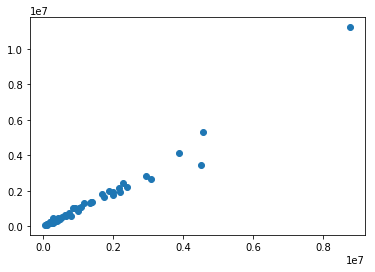

In [32]:
scores = cross_val_score(slrD16, data, yD16, cv=4)
print('Cross-validated scores =', scores)

predictions = cross_val_predict(slrD16, data, yD16, cv=4)
plt.scatter(yD16, predictions)

r2 = metrics.r2_score(yD16, predictions)
print('Cross-Predicted R2 =', r2)

In [33]:
Dem_12 = ACS_TAPP_12_1YR_Est.iloc[:, :-1]
Dem_12

Estimate; HOUSEHOLDS BY TYPE - Family households (families)  \
STATE                                                                                  
Alabama_12                                                         1233937             
Alaska_12                                                           166400             
Arizona_12                                                         1560687             
Arkansas_12                                                         758601             
California_12                                                      8585787             
Colorado_12                                                        1278264             
Connecticut_12                                                      902369             
Delaware_12                                                         225593             
District of Columbia_12                                             112493             
Florida_12                                                         4598222             
Georgia_12                                                         2406226             
Hawaii_12                                                           309165             
Idaho_12                                                            405908             
Illinois_12                                                        3121020             
Indiana_12                                                         1648172             
Iowa_12                                                             796744             
Kansas_12                                                           727171             
Kentucky_12                                                        1140771             
Louisiana_12                                                       1125659             
Maine_12                                                            346950             
Maryland_12                                                        1437113             
Massachusetts_12                                                   1598867             
Michigan_12                                                        2482612             
Minnesota_12                                                       1374436             
Mississippi_12                                                      747620             
Missouri_12                                                        1517231             
Montana_12                                                          259650             
Nebraska_12                                                         474564             
Nevada_12                                                           650833             
New Hampshire_12                                                    341718             
New Jersey_12                                                      2211642             
New Mexico_12                                                       501421             
New York_12                                                        4587857             
North Carolina_12                                                  2472230             
North Dakota_12                                                     175380             
Ohio_12                                                            2913312             
Oklahoma_12                                                         957067             
Oregon_12                                                           964892             
Pennsylvania_12                                                    3202089             
Rhode Island_12                                                     257419             
South Carolina_12                                                  1204041             
South Dakota_12                                                     206668             
Tennessee_12                                                       1641665             
Texas_12                                                         

In [34]:
# target = 2012 Democrat Votes

yD12 = Dem_12['Democrat Votes']

In [35]:
data = pd.DataFrame(Dem_12.iloc[:, :-1])
XD12_train, XD12_test, yD12_train, yD12_test = train_test_split(data, yD12, test_size=0.5)

In [36]:
print(XD12_train.shape)
XD12_train

(25, 507)


Estimate; HOUSEHOLDS BY TYPE - Family households (families)  \
STATE                                                                                  
Delaware_12                                                         225593             
Colorado_12                                                        1278264             
New Jersey_12                                                      2211642             
Nevada_12                                                           650833             
Iowa_12                                                             796744             
Washington_12                                                      1687786             
Connecticut_12                                                      902369             
Rhode Island_12                                                     257419             
South Dakota_12                                                     206668             
Maryland_12                                                        1437113             
New York_12                                                        4587857             
District of Columbia_12                                             112493             
West Virginia_12                                                    471536             
Mississippi_12                                                      747620             
Georgia_12                                                         2406226             
Pennsylvania_12                                                    3202089             
Indiana_12                                                         1648172             
Alaska_12                                                           166400             
New Mexico_12                                                       501421             
Montana_12                                                          259650             
Kentucky_12                                                        1140771             
Vermont_12                                                          160878             
Kansas_12                                                           727171             
South Carolina_12                                                  1204041             
Oregon_12                                                           964892             

                         Estimate; HOUSEHOLDS BY TYPE - Family households (families) - With own children under 18 years  \
STATE                                                                                                                     
Delaware_12                                                          92860                                                
Colorado_12                                                         589021                                                
New Jersey_12                                                      1009713                                                
Nevada_12                                                           298464                                                
Iowa_12                                                             347214                                                
Washington_12                                                       752039                                                
Connecticut_12                                                      401316                                                
Rhode Island_12                                                     106858                                                
South Dakota_12                                                      88894                                                
Maryland_12                                                         633449                                                
New York_12                                                        2015419                                                
District of Columbia_12                          

In [37]:
XD12_test

Estimate; HOUSEHOLDS BY TYPE - Family households (families)  \
STATE                                                                            
Maine_12                                                      346950             
Oklahoma_12                                                   957067             
Massachusetts_12                                             1598867             
Michigan_12                                                  2482612             
Wyoming_12                                                    146745             
Virginia_12                                                  2044422             
Texas_12                                                     6239195             
Arkansas_12                                                   758601             
Idaho_12                                                      405908             
Illinois_12                                                  3121020             
Utah_12                                                       666661             
Arizona_12                                                   1560687             
North Dakota_12                                               175380             
Tennessee_12                                                 1641665             
Minnesota_12                                                 1374436             
Missouri_12                                                  1517231             
Alabama_12                                                   1233937             
California_12                                                8585787             
Ohio_12                                                      2913312             
New Hampshire_12                                              341718             
Wisconsin_12                                                 1461573             
Florida_12                                                   4598222             
Hawaii_12                                                     309165             
North Carolina_12                                            2472230             
Louisiana_12                                                 1125659             
Nebraska_12                                                   474564             

                   Estimate; HOUSEHOLDS BY TYPE - Family households (families) - With own children under 18 years  \
STATE                                                                                                               
Maine_12                                                      135007                                                
Oklahoma_12                                                   416517                                                
Massachusetts_12                                              698945                                                
Michigan_12                                                  1041802                                                
Wyoming_12                                                     63649                                                
Virginia_12                                                   895668                                                
Texas_12                                                     3027703                                                
Arkansas_12                                                   315273                                                
Idaho_12                                                      184148                                                
Illinois_12                                                  1398372                                                
Utah_12                                                       345172                                                
Arizona_12                                                    674358                                                
North Dakota_12                                                74751                

In [38]:
yD12_train

STATE
Delaware_12                 242584
Colorado_12                1323101
New Jersey_12              2122786
Nevada_12                   531373
Iowa_12                     822544
Washington_12              1755396
Connecticut_12              905083
Rhode Island_12             279677
South Dakota_12             145039
Maryland_12                1677844
New York_12                4471871
District of Columbia_12     267070
West Virginia_12            238269
Mississippi_12              562949
Georgia_12                 1773827
Pennsylvania_12            2990274
Indiana_12                 1152887
Alaska_12                   122640
New Mexico_12               415335
Montana_12                  201839
Kentucky_12                 679370
Vermont_12                  199239
Kansas_12                   440726
South Carolina_12           865941
Oregon_12                   970488
Name: Democrat Votes, dtype: int32

In [39]:
yD12_test

STATE
Maine_12              401306
Oklahoma_12           443547
Massachusetts_12     1921290
Michigan_12          2564569
Wyoming_12             69286
Virginia_12          1971820
Texas_12             3308124
Arkansas_12           394409
Idaho_12              212787
Illinois_12          3019512
Utah_12               251813
Arizona_12           1025232
North Dakota_12       124966
Tennessee_12          960709
Minnesota_12         1546167
Missouri_12          1223796
Alabama_12            795696
California_12        7854285
Ohio_12              2827621
New Hampshire_12      369561
Wisconsin_12         1620985
Florida_12           4237756
Hawaii_12             306658
North Carolina_12    2178391
Louisiana_12          809141
Nebraska_12           302081
Name: Democrat Votes, dtype: int32

In [40]:
slrD12 = LinearRegression()
slrD12.fit(XD12_train, yD12_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
print(slrD12.score(XD12_test, yD12_test))
print(slrD12.score(XD12_train, yD12_train))

0.95698962335
1.0


Cross-validated scores = [ 0.8605717   0.96402774  0.96358212  0.96145608]
Cross-Predicted R2 = 0.905555174767


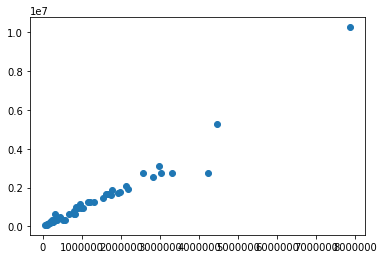

In [42]:
scores = cross_val_score(slrD12, data, yD12, cv=4)
print('Cross-validated scores =', scores)

predictions = cross_val_predict(slrD12, data, yD12, cv=4)
plt.scatter(yD12, predictions)

r2 = metrics.r2_score(yD12, predictions)
print('Cross-Predicted R2 =', r2)

In [43]:
Dem_08 = ACS_TAPP_08_1YR_Est.iloc[:, :-1]
Dem_08

Number; Estimate; HOUSEHOLDS BY TYPE - Total households - Family households (families)  \
STATE                                                                                                             
Alabama_08                                                         1216612                                        
Alaska_08                                                           157273                                        
Arizona_08                                                         1489192                                        
Arkansas_08                                                         751956                                        
California_08                                                      8265877                                        
Colorado_08                                                        1208994                                        
Connecticut_08                                                      888825                                        
Delaware_08                                                         222044                                        
District of Columbia_08                                             107365                                        
Florida_08                                                         4577227                                        
Georgia_08                                                         2364041                                        
Hawaii_08                                                           303344                                        
Idaho_08                                                            396253                                        
Illinois_08                                                        3138757                                        
Indiana_08                                                         1648431                                        
Iowa_08                                                             791790                                        
Kansas_08                                                           736264                                        
Kentucky_08                                                        1125630                                        
Louisiana_08                                                       1094141                                        
Maine_08                                                            343822                                        
Maryland_08                                                        1395778                                        
Massachusetts_08                                                   1568641                                        
Michigan_08                                                        2525388                                        
Minnesota_08                                                       1342724                                        
Mississippi_08                                                      755248                                        
Missouri_08                                                        1529540                                        
Montana_08                                                          237574                                        
Nebraska_08                                                         457459                                        
Nevada_08                                                           615019                                        
New Hampshire_08                                                    345324                                        
New Jersey_08                                                      2168377                                        
New Mexico_08                                                       482159                                        
New York_08                                                        4582314                                        


In [44]:
# target = 2008 Democrat Votes

yD08 = Dem_08['Democrat Votes']

In [45]:
data = pd.DataFrame(Dem_08.iloc[:, :-1])
XD08_train, XD08_test, yD08_train, yD08_test = train_test_split(data, yD08, test_size=0.5)

In [46]:
print(XD08_train.shape)
XD08_train

(25, 487)


Number; Estimate; HOUSEHOLDS BY TYPE - Total households - Family households (families)  \
STATE                                                                                                       
Nevada_08                                                     615019                                        
Montana_08                                                    237574                                        
Kansas_08                                                     736264                                        
Alaska_08                                                     157273                                        
Tennessee_08                                                 1623272                                        
Wisconsin_08                                                 1467796                                        
Nebraska_08                                                   457459                                        
Wyoming_08                                                    135678                                        
Iowa_08                                                       791790                                        
Delaware_08                                                   222044                                        
New York_08                                                  4582314                                        
Minnesota_08                                                 1342724                                        
Connecticut_08                                                888825                                        
West Virginia_08                                              491152                                        
Kentucky_08                                                  1125630                                        
Mississippi_08                                                755248                                        
Vermont_08                                                    160454                                        
Michigan_08                                                  2525388                                        
Georgia_08                                                   2364041                                        
North Carolina_08                                            2397731                                        
Idaho_08                                                      396253                                        
Pennsylvania_08                                              3205114                                        
North Dakota_08                                               170921                                        
Indiana_08                                                   1648431                                        
New Hampshire_08                                              345324                                        

                   Number; Estimate; HOUSEHOLDS BY TYPE - Total households - Family households (families) - With own children under 18 years  \
STATE                                                                                                                                          
Nevada_08                                                     297024                                                                           
Montana_08                                                     99632                                                                           
Kansas_08                                                     345138                                                                           
Alaska_08                                                      81548                                                                           
Tennessee_08                                                  713472                                                                           
Wisconsin_08                                                  66619

In [47]:
XD08_test

Number; Estimate; HOUSEHOLDS BY TYPE - Total households - Family households (families)  \
STATE                                                                                                             
Arkansas_08                                                         751956                                        
Colorado_08                                                        1208994                                        
Illinois_08                                                        3138757                                        
District of Columbia_08                                             107365                                        
Hawaii_08                                                           303344                                        
South Carolina_08                                                  1142172                                        
Maryland_08                                                        1395778                                        
Arizona_08                                                         1489192                                        
Maine_08                                                            343822                                        
New Jersey_08                                                      2168377                                        
Louisiana_08                                                       1094141                                        
Oklahoma_08                                                         936539                                        
New Mexico_08                                                       482159                                        
Rhode Island_08                                                     247759                                        
Missouri_08                                                        1529540                                        
Massachusetts_08                                                   1568641                                        
Florida_08                                                         4577227                                        
Washington_08                                                      1636755                                        
Texas_08                                                           5868201                                        
South Dakota_08                                                     206239                                        
Oregon_08                                                           939487                                        
Ohio_08                                                            2936172                                        
California_08                                                      8265877                                        
Alabama_08                                                         1216612                                        
Utah_08                                                             632317                                        
Virginia_08                                                        1999409                                        

                         Number; Estimate; HOUSEHOLDS BY TYPE - Total households - Family households (families) - With own children under 18 years  \
STATE                                                                                                                                                
Arkansas_08                                                         324244                                                                           
Colorado_08                                                         577250                                                                           
Illinois_08                                                        1496679                                                                           
District of Columbia_08                               

In [48]:
yD08_train

STATE
Nevada_08             533736
Montana_08            231667
Kansas_08             514765
Alaska_08             123594
Tennessee_08         1087437
Wisconsin_08         1677211
Nebraska_08           333319
Wyoming_08             82868
Iowa_08               828940
Delaware_08           255459
New York_08          4769700
Minnesota_08         1573354
Connecticut_08        997772
West Virginia_08      303857
Kentucky_08           751985
Mississippi_08        554662
Vermont_08            219262
Michigan_08          2872579
Georgia_08           1844137
North Carolina_08    2142651
Idaho_08              236440
Pennsylvania_08      3276363
North Dakota_08       141278
Indiana_08           1374039
New Hampshire_08      384826
Name: Democrat Votes, dtype: int32

In [49]:
yD08_test

STATE
Arkansas_08                 422310
Colorado_08                1288576
Illinois_08                3419673
District of Columbia_08     245800
Hawaii_08                   325871
South Carolina_08           862449
Maryland_08                1629467
Arizona_08                 1034707
Maine_08                    421923
New Jersey_08              2215422
Louisiana_08                782989
Oklahoma_08                 502496
New Mexico_08               472422
Rhode Island_08             296571
Missouri_08                1441911
Massachusetts_08           1904097
Florida_08                 4282074
Washington_08              1750848
Texas_08                   3528633
South Dakota_08             170924
Oregon_08                  1037291
Ohio_08                    2933388
California_08              8274473
Alabama_08                  813479
Utah_08                     327670
Virginia_08                1959532
Name: Democrat Votes, dtype: int32

In [50]:
yD08_test

STATE
Arkansas_08                 422310
Colorado_08                1288576
Illinois_08                3419673
District of Columbia_08     245800
Hawaii_08                   325871
South Carolina_08           862449
Maryland_08                1629467
Arizona_08                 1034707
Maine_08                    421923
New Jersey_08              2215422
Louisiana_08                782989
Oklahoma_08                 502496
New Mexico_08               472422
Rhode Island_08             296571
Missouri_08                1441911
Massachusetts_08           1904097
Florida_08                 4282074
Washington_08              1750848
Texas_08                   3528633
South Dakota_08             170924
Oregon_08                  1037291
Ohio_08                    2933388
California_08              8274473
Alabama_08                  813479
Utah_08                     327670
Virginia_08                1959532
Name: Democrat Votes, dtype: int32

In [51]:
slrD08 = LinearRegression()
slrD08.fit(XD08_train, yD08_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
print(slrD08.score(XD08_test, yD08_test))
print(slrD08.score(XD08_train, yD08_train))

0.953805599411
1.0


Cross-validated scores = [ 0.95175482  0.96236085  0.97580959  0.87367227]
Cross-Predicted R2 = 0.950867190907


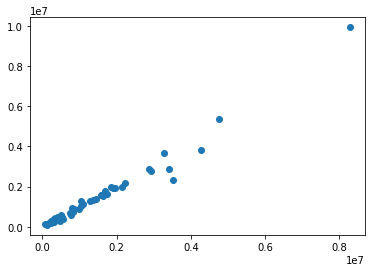

In [53]:
scores = cross_val_score(slrD08, data, yD08, cv=4)
print('Cross-validated scores =', scores)

predictions = cross_val_predict(slrD08, data, yD08, cv=4)
plt.scatter(yD08, predictions)

r2 = metrics.r2_score(yD08, predictions)
print('Cross-Predicted R2 =', r2)

# Linear regression modeling for Republican votes

In [54]:
Rep_16 = ACS_TAPP_16_1YR_Est.loc[:, ACS_TAPP_16_1YR_Est.columns != 'Democrat Votes']
Rep_16

Estimate; HOUSEHOLDS BY TYPE - Family households (families)  \
STATE                                                                                  
Alabama_16                                                         1208362             
Alaska_16                                                           164102             
Arizona_16                                                         1648739             
Arkansas_16                                                         747917             
California_16                                                      8887761             
Colorado_16                                                        1347936             
Connecticut_16                                                      880600             
Delaware_16                                                         232433             
District of Columbia_16                                             122732             
Florida_16                                                         4864461             
Georgia_16                                                         2479003             
Hawaii_16                                                           315505             
Idaho_16                                                            411617             
Illinois_16                                                        3100613             
Indiana_16                                                         1645758             
Iowa_16                                                             795043             
Kansas_16                                                           716005             
Kentucky_16                                                        1121404             
Louisiana_16                                                       1097712             
Maine_16                                                            329554             
Maryland_16                                                        1458953             
Massachusetts_16                                                   1633661             
Michigan_16                                                        2476595             
Minnesota_16                                                       1367104             
Mississippi_16                                                      730719             
Missouri_16                                                        1527349             
Montana_16                                                          257449             
Nebraska_16                                                         476436             
Nevada_16                                                           670968             
New Hampshire_16                                                    342912             
New Jersey_16                                                      2197150             
New Mexico_16                                                       481127             
New York_16                                                        4541583             
North Carolina_16                                                  2542663             
North Dakota_16                                                     184904             
Ohio_16                                                            2929661             
Oklahoma_16                                                         961731             
Oregon_16                                                           995749             
Pennsylvania_16                                                    3150563             
Rhode Island_16                                                     247448             
South Carolina_16                                                  1224695             
South Dakota_16                                                     209986             
Tennessee_16                                                       1670605             
Texas_16                                                         

In [55]:
# target = 2016 Republican Votes

yR16 = Rep_16['Republican Votes']

In [56]:
data = pd.DataFrame(Rep_16.iloc[:, :-1])
XR16_train, XR16_test, yR16_train, yR16_test = train_test_split(data, yR16, test_size=0.5)

In [57]:
print(XR16_train.shape)
XR16_train

(25, 515)


Estimate; HOUSEHOLDS BY TYPE - Family households (families)  \
STATE                                                                            
Missouri_16                                                  1527349             
Alabama_16                                                   1208362             
Wisconsin_16                                                 1460922             
New York_16                                                  4541583             
New Mexico_16                                                 481127             
Louisiana_16                                                 1097712             
Utah_16                                                       711124             
Indiana_16                                                   1645758             
Connecticut_16                                                880600             
New Hampshire_16                                              342912             
North Carolina_16                                            2542663             
Illinois_16                                                  3100613             
Vermont_16                                                    154421             
Nebraska_16                                                   476436             
Massachusetts_16                                             1633661             
Florida_16                                                   4864461             
Hawaii_16                                                     315505             
Oklahoma_16                                                   961731             
Pennsylvania_16                                              3150563             
West Virginia_16                                              467396             
Wyoming_16                                                    145524             
Washington_16                                                1784043             
Nevada_16                                                     670968             
Delaware_16                                                   232433             
Oregon_16                                                     995749             

                   Estimate; HOUSEHOLDS BY TYPE - Family households (families) - With own children of the householder under 18 years  \
STATE                                                                                                                                  
Missouri_16                                                   633173                                                                   
Alabama_16                                                    473593                                                                   
Wisconsin_16                                                  608206                                                                   
New York_16                                                  1876874                                                                   
New Mexico_16                                                 195512                                                                   
Louisiana_16                                                  463602                                                                   
Utah_16                                                       357341                                                                   
Indiana_16                                                    700451                                                                   
Connecticut_16                                                359819                                                                   
New Hampshire_16                                              130641                                                                   
North Carolina_16                                            1071946                                                                   
Illinois_16                         

In [58]:
XR16_test

Estimate; HOUSEHOLDS BY TYPE - Family households (families)  \
STATE                                                                                  
Kentucky_16                                                        1121404             
South Dakota_16                                                     209986             
South Carolina_16                                                  1224695             
Rhode Island_16                                                     247448             
Michigan_16                                                        2476595             
New Jersey_16                                                      2197150             
North Dakota_16                                                     184904             
Maine_16                                                            329554             
Georgia_16                                                         2479003             
Mississippi_16                                                      730719             
Alaska_16                                                           164102             
Tennessee_16                                                       1670605             
Iowa_16                                                             795043             
California_16                                                      8887761             
Texas_16                                                           6602215             
Arkansas_16                                                         747917             
Minnesota_16                                                       1367104             
Colorado_16                                                        1347936             
District of Columbia_16                                             122732             
Arizona_16                                                         1648739             
Kansas_16                                                           716005             
Maryland_16                                                        1458953             
Idaho_16                                                            411617             
Ohio_16                                                            2929661             
Montana_16                                                          257449             
Virginia_16                                                        2063049             

                         Estimate; HOUSEHOLDS BY TYPE - Family households (families) - With own children of the householder under 18 years  \
STATE                                                                                                                                        
Kentucky_16                                                         463090                                                                   
South Dakota_16                                                      92357                                                                   
South Carolina_16                                                   473087                                                                   
Rhode Island_16                                                      99442                                                                   
Michigan_16                                                         992441                                                                   
New Jersey_16                                                       947058                                                                   
North Dakota_16                                                      82171                                                                   
Maine_16                                                            118579                                                                   
Georgia_16                                                         1103858                                                                  

In [59]:
yR16_train

STATE
Missouri_16          1594511
Alabama_16           1318255
Wisconsin_16         1405284
New York_16          2819534
New Mexico_16         319666
Louisiana_16         1178638
Utah_16               515231
Indiana_16           1557286
Connecticut_16        673215
New Hampshire_16      345790
North Carolina_16    2362631
Illinois_16          2146015
Vermont_16             95369
Nebraska_16           495961
Massachusetts_16     1090893
Florida_16           4617886
Hawaii_16             128847
Oklahoma_16           949136
Pennsylvania_16      2970733
West Virginia_16      489371
Wyoming_16            174419
Washington_16        1221747
Nevada_16             512058
Delaware_16           185127
Oregon_16             782403
Name: Republican Votes, dtype: int32

In [60]:
yR16_test

STATE
Kentucky_16                1202971
South Dakota_16             227721
South Carolina_16          1155389
Rhode Island_16             180543
Michigan_16                2279543
New Jersey_16              1601933
North Dakota_16             216794
Maine_16                    335593
Georgia_16                 2089104
Mississippi_16              700714
Alaska_16                   163387
Tennessee_16               1522925
Iowa_16                     800983
California_16              4483810
Texas_16                   4685047
Arkansas_16                 684872
Minnesota_16               1322951
Colorado_16                1202484
District of Columbia_16      12723
Arizona_16                 1252401
Kansas_16                   671018
Maryland_16                 943169
Idaho_16                    409055
Ohio_16                    2841005
Montana_16                  279240
Virginia_16                1769443
Name: Republican Votes, dtype: int32

In [61]:
slrR16 = LinearRegression()
slrR16.fit(XR16_train, yR16_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
print(slrR16.score(XR16_test, yR16_test))
print(slrR16.score(XR16_train, yR16_train))

0.784282331248
1.0


Cross-validated scores = [ 0.62287358  0.92847909  0.99197638  0.97113527]
Cross-Predicted R2 = 0.819092299484


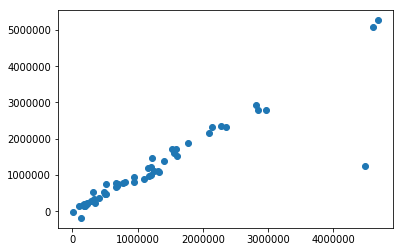

In [63]:
scores = cross_val_score(slrR16, data, yR16, cv=4)
print('Cross-validated scores =', scores)

predictions = cross_val_predict(slrR16, data, yR16, cv=4)
plt.scatter(yR16, predictions)

r2 = metrics.r2_score(yR16, predictions)
print('Cross-Predicted R2 =', r2)

In [64]:
Rep_12 = ACS_TAPP_12_1YR_Est.loc[:, ACS_TAPP_12_1YR_Est.columns != 'Democrat Votes']
Rep_12

Estimate; HOUSEHOLDS BY TYPE - Family households (families)  \
STATE                                                                                  
Alabama_12                                                         1233937             
Alaska_12                                                           166400             
Arizona_12                                                         1560687             
Arkansas_12                                                         758601             
California_12                                                      8585787             
Colorado_12                                                        1278264             
Connecticut_12                                                      902369             
Delaware_12                                                         225593             
District of Columbia_12                                             112493             
Florida_12                                                         4598222             
Georgia_12                                                         2406226             
Hawaii_12                                                           309165             
Idaho_12                                                            405908             
Illinois_12                                                        3121020             
Indiana_12                                                         1648172             
Iowa_12                                                             796744             
Kansas_12                                                           727171             
Kentucky_12                                                        1140771             
Louisiana_12                                                       1125659             
Maine_12                                                            346950             
Maryland_12                                                        1437113             
Massachusetts_12                                                   1598867             
Michigan_12                                                        2482612             
Minnesota_12                                                       1374436             
Mississippi_12                                                      747620             
Missouri_12                                                        1517231             
Montana_12                                                          259650             
Nebraska_12                                                         474564             
Nevada_12                                                           650833             
New Hampshire_12                                                    341718             
New Jersey_12                                                      2211642             
New Mexico_12                                                       501421             
New York_12                                                        4587857             
North Carolina_12                                                  2472230             
North Dakota_12                                                     175380             
Ohio_12                                                            2913312             
Oklahoma_12                                                         957067             
Oregon_12                                                           964892             
Pennsylvania_12                                                    3202089             
Rhode Island_12                                                     257419             
South Carolina_12                                                  1204041             
South Dakota_12                                                     206668             
Tennessee_12                                                       1641665             
Texas_12                                                         

In [65]:
# target = 2012 Republican Votes

yR12 = Rep_12['Republican Votes']

In [66]:
data = pd.DataFrame(Rep_12.iloc[:, :-1])
XR12_train, XR12_test, yR12_train, yR12_test = train_test_split(data, yR12, test_size=0.5)

In [67]:
print(XR12_train.shape)
XR12_train

(25, 507)


Estimate; HOUSEHOLDS BY TYPE - Family households (families)  \
STATE                                                                                  
California_12                                                      8585787             
Illinois_12                                                        3121020             
District of Columbia_12                                             112493             
Ohio_12                                                            2913312             
Pennsylvania_12                                                    3202089             
Virginia_12                                                        2044422             
South Dakota_12                                                     206668             
Maine_12                                                            346950             
Nevada_12                                                           650833             
New York_12                                                        4587857             
Colorado_12                                                        1278264             
Washington_12                                                      1687786             
Arkansas_12                                                         758601             
Vermont_12                                                          160878             
New Hampshire_12                                                    341718             
Wisconsin_12                                                       1461573             
Oregon_12                                                           964892             
Hawaii_12                                                           309165             
Alaska_12                                                           166400             
Wyoming_12                                                          146745             
Georgia_12                                                         2406226             
Kansas_12                                                           727171             
Maryland_12                                                        1437113             
Florida_12                                                         4598222             
New Jersey_12                                                      2211642             

                         Estimate; HOUSEHOLDS BY TYPE - Family households (families) - With own children under 18 years  \
STATE                                                                                                                     
California_12                                                      4046765                                                
Illinois_12                                                        1398372                                                
District of Columbia_12                                              46568                                                
Ohio_12                                                            1230760                                                
Pennsylvania_12                                                    1285713                                                
Virginia_12                                                         895668                                                
South Dakota_12                                                      88894                                                
Maine_12                                                            135007                                                
Nevada_12                                                           298464                                                
New York_12                                                        2015419                                                
Colorado_12                                                         589021                                                
Washington_12                                    

In [68]:
XR12_test

Estimate; HOUSEHOLDS BY TYPE - Family households (families)  \
STATE                                                                            
Nebraska_12                                                   474564             
Louisiana_12                                                 1125659             
Connecticut_12                                                902369             
Texas_12                                                     6239195             
South Carolina_12                                            1204041             
Minnesota_12                                                 1374436             
Indiana_12                                                   1648172             
Rhode Island_12                                               257419             
North Carolina_12                                            2472230             
Alabama_12                                                   1233937             
Missouri_12                                                  1517231             
West Virginia_12                                              471536             
Kentucky_12                                                  1140771             
Delaware_12                                                   225593             
Mississippi_12                                                747620             
Montana_12                                                    259650             
Oklahoma_12                                                   957067             
Tennessee_12                                                 1641665             
Michigan_12                                                  2482612             
Massachusetts_12                                             1598867             
Utah_12                                                       666661             
Idaho_12                                                      405908             
Iowa_12                                                       796744             
Arizona_12                                                   1560687             
New Mexico_12                                                 501421             
North Dakota_12                                               175380             

                   Estimate; HOUSEHOLDS BY TYPE - Family households (families) - With own children under 18 years  \
STATE                                                                                                               
Nebraska_12                                                   216935                                                
Louisiana_12                                                  491081                                                
Connecticut_12                                                401316                                                
Texas_12                                                     3027703                                                
South Carolina_12                                             491485                                                
Minnesota_12                                                  619780                                                
Indiana_12                                                    719823                                                
Rhode Island_12                                               106858                                                
North Carolina_12                                            1077533                                                
Alabama_12                                                    502537                                                
Missouri_12                                                   641438                                                
West Virginia_12                                              175829                                                
Kentucky_12                                                   475764                

In [69]:
yR12_train

STATE
California_12              4839958
Illinois_12                2135216
District of Columbia_12      21381
Ohio_12                    2661407
Pennsylvania_12            2680434
Virginia_12                1822522
South Dakota_12             210610
Maine_12                    292276
Nevada_12                   463567
New York_12                2485432
Colorado_12                1185243
Washington_12              1290670
Arkansas_12                 647744
Vermont_12                   92698
New Hampshire_12            329918
Wisconsin_12               1410966
Oregon_12                   754175
Hawaii_12                   121015
Alaska_12                   164676
Wyoming_12                  170962
Georgia_12                 2078688
Kansas_12                   692634
Maryland_12                 971869
Florida_12                 4163447
New Jersey_12              1478088
Name: Republican Votes, dtype: int32

In [70]:
yR12_test

STATE
Nebraska_12           475064
Louisiana_12         1152262
Connecticut_12        634892
Texas_12             4569843
South Carolina_12    1071645
Minnesota_12         1320225
Indiana_12           1420543
Rhode Island_12       157204
North Carolina_12    2270395
Alabama_12           1255925
Missouri_12          1482440
West Virginia_12      417655
Kentucky_12          1087190
Delaware_12           165484
Mississippi_12        710746
Montana_12            267928
Oklahoma_12           891325
Tennessee_12         1462330
Michigan_12          2115256
Massachusetts_12     1188314
Utah_12               740600
Idaho_12              420911
Iowa_12               730617
Arizona_12           1233654
New Mexico_12         335788
North Dakota_12       188320
Name: Republican Votes, dtype: int32

In [71]:
slrR12 = LinearRegression()
slrR12.fit(XR12_train, yR12_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
print(slrR12.score(XR12_test, yR12_test))
print(slrR12.score(XR12_train, yR12_train))

0.943052770498
1.0


Cross-validated scores = [ 0.7249891   0.90100735  0.91132435  0.92438238]
Cross-Predicted R2 = 0.827643807934


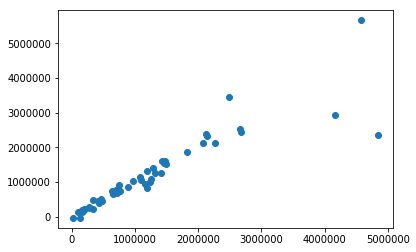

In [73]:
scores = cross_val_score(slrR12, data, yR12, cv=4)
print('Cross-validated scores =', scores)

predictions = cross_val_predict(slrR12, data, yR12, cv=4)
plt.scatter(yR12, predictions)

r2 = metrics.r2_score(yR12, predictions)
print('Cross-Predicted R2 =', r2)

In [74]:
Rep_08 = ACS_TAPP_08_1YR_Est.loc[:, ACS_TAPP_08_1YR_Est.columns != 'Democrat Votes']
Rep_08

Number; Estimate; HOUSEHOLDS BY TYPE - Total households - Family households (families)  \
STATE                                                                                                             
Alabama_08                                                         1216612                                        
Alaska_08                                                           157273                                        
Arizona_08                                                         1489192                                        
Arkansas_08                                                         751956                                        
California_08                                                      8265877                                        
Colorado_08                                                        1208994                                        
Connecticut_08                                                      888825                                        
Delaware_08                                                         222044                                        
District of Columbia_08                                             107365                                        
Florida_08                                                         4577227                                        
Georgia_08                                                         2364041                                        
Hawaii_08                                                           303344                                        
Idaho_08                                                            396253                                        
Illinois_08                                                        3138757                                        
Indiana_08                                                         1648431                                        
Iowa_08                                                             791790                                        
Kansas_08                                                           736264                                        
Kentucky_08                                                        1125630                                        
Louisiana_08                                                       1094141                                        
Maine_08                                                            343822                                        
Maryland_08                                                        1395778                                        
Massachusetts_08                                                   1568641                                        
Michigan_08                                                        2525388                                        
Minnesota_08                                                       1342724                                        
Mississippi_08                                                      755248                                        
Missouri_08                                                        1529540                                        
Montana_08                                                          237574                                        
Nebraska_08                                                         457459                                        
Nevada_08                                                           615019                                        
New Hampshire_08                                                    345324                                        
New Jersey_08                                                      2168377                                        
New Mexico_08                                                       482159                                        
New York_08                                                        4582314                                        


In [75]:
# target = 2008 Republican Votes

yR08 = Rep_08['Republican Votes']

In [76]:
data = pd.DataFrame(Rep_08.iloc[:, :-1])
XR08_train, XR08_test, yR08_train, yR08_test = train_test_split(data, yR08, test_size=0.5)

In [77]:
print(XR08_train.shape)
XR08_train

(25, 487)


Number; Estimate; HOUSEHOLDS BY TYPE - Total households - Family households (families)  \
STATE                                                                                                      
Wisconsin_08                                                1467796                                        
Kansas_08                                                    736264                                        
Minnesota_08                                                1342724                                        
Hawaii_08                                                    303344                                        
Georgia_08                                                  2364041                                        
Connecticut_08                                               888825                                        
Arizona_08                                                  1489192                                        
West Virginia_08                                             491152                                        
Illinois_08                                                 3138757                                        
Mississippi_08                                               755248                                        
Indiana_08                                                  1648431                                        
Tennessee_08                                                1623272                                        
Colorado_08                                                 1208994                                        
Maryland_08                                                 1395778                                        
Vermont_08                                                   160454                                        
Nevada_08                                                    615019                                        
California_08                                               8265877                                        
Iowa_08                                                      791790                                        
Nebraska_08                                                  457459                                        
Pennsylvania_08                                             3205114                                        
Oklahoma_08                                                  936539                                        
Missouri_08                                                 1529540                                        
New Mexico_08                                                482159                                        
Virginia_08                                                 1999409                                        
Texas_08                                                    5868201                                        

                  Number; Estimate; HOUSEHOLDS BY TYPE - Total households - Family households (families) - With own children under 18 years  \
STATE                                                                                                                                         
Wisconsin_08                                                 666193                                                                           
Kansas_08                                                    345138                                                                           
Minnesota_08                                                 641169                                                                           
Hawaii_08                                                    123662                                                                           
Georgia_08                                                  1140219                                                                           
Connecticut_08                                               414094                                 

In [78]:
XR08_test

Number; Estimate; HOUSEHOLDS BY TYPE - Total households - Family households (families)  \
STATE                                                                                                             
South Dakota_08                                                     206239                                        
Arkansas_08                                                         751956                                        
Maine_08                                                            343822                                        
Kentucky_08                                                        1125630                                        
District of Columbia_08                                             107365                                        
Massachusetts_08                                                   1568641                                        
North Dakota_08                                                     170921                                        
Delaware_08                                                         222044                                        
Wyoming_08                                                          135678                                        
Rhode Island_08                                                     247759                                        
Alaska_08                                                           157273                                        
Idaho_08                                                            396253                                        
New Jersey_08                                                      2168377                                        
Florida_08                                                         4577227                                        
Utah_08                                                             632317                                        
Montana_08                                                          237574                                        
South Carolina_08                                                  1142172                                        
Alabama_08                                                         1216612                                        
New Hampshire_08                                                    345324                                        
Michigan_08                                                        2525388                                        
Ohio_08                                                            2936172                                        
Washington_08                                                      1636755                                        
Oregon_08                                                           939487                                        
Louisiana_08                                                       1094141                                        
New York_08                                                        4582314                                        
North Carolina_08                                                  2397731                                        

                         Number; Estimate; HOUSEHOLDS BY TYPE - Total households - Family households (families) - With own children under 18 years  \
STATE                                                                                                                                                
South Dakota_08                                                      93275                                                                           
Arkansas_08                                                         324244                                                                           
Maine_08                                                            144547                                                                           
Kentucky_08                                           

In [79]:
yR08_train

STATE
Wisconsin_08        1262393
Kansas_08            699655
Minnesota_08        1275409
Hawaii_08            120566
Georgia_08          2048744
Connecticut_08       629428
Arizona_08          1230111
West Virginia_08     397466
Illinois_08         2031527
Mississippi_08       724597
Indiana_08          1345648
Tennessee_08        1479178
Colorado_08         1073589
Maryland_08          959862
Vermont_08            98974
Nevada_08            412827
California_08       5011781
Iowa_08              682379
Nebraska_08          452979
Pennsylvania_08     2655885
Oklahoma_08          960165
Missouri_08         1445814
New Mexico_08        346832
Virginia_08         1725005
Texas_08            4479328
Name: Republican Votes, dtype: int32

In [80]:
yR08_test

STATE
South Dakota_08             203054
Arkansas_08                 638017
Maine_08                    295273
Kentucky_08                1048462
District of Columbia_08      17367
Massachusetts_08           1108854
North Dakota_08             168601
Delaware_08                 152374
Wyoming_08                  164958
Rhode Island_08             165391
Alaska_08                   193841
Idaho_08                    403012
New Jersey_08              1613207
Florida_08                 4045624
Utah_08                     596030
Montana_08                  242763
South Carolina_08          1034896
Alabama_08                 1266546
New Hampshire_08            316534
Michigan_08                2048639
Ohio_08                    2674491
Washington_08              1229216
Oregon_08                   738475
Louisiana_08               1148275
New York_08                2742298
North Carolina_08          2128474
Name: Republican Votes, dtype: int32

In [81]:
slrR08 = LinearRegression()
slrR08.fit(XR08_train, yR08_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
print(slrR08.score(XR08_test, yR08_test))
print(slrR08.score(XR08_train, yR08_train))

0.962388299286
1.0


Cross-validated scores = [ 0.77710933  0.88912185  0.95994364  0.8977811 ]
Cross-Predicted R2 = 0.853439854558


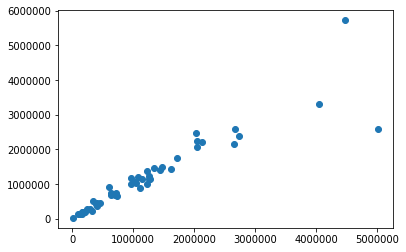

In [83]:
scores = cross_val_score(slrR08, data, yR08, cv=4)
print('Cross-validated scores =', scores)

predictions = cross_val_predict(slrR08, data, yR08, cv=4)
plt.scatter(yR08, predictions)

r2 = metrics.r2_score(yR08, predictions)
print('Cross-Predicted R2 =', r2)

In [84]:
Dem_16.to_csv('Dem_16.csv')

In [85]:
Dem_12.to_csv('Dem_12.csv')

In [86]:
Dem_08.to_csv('Dem_08.csv')

In [87]:
Rep_16.to_csv('Rep_16.csv')

In [88]:
Rep_12.to_csv('Rep_12.csv')

In [89]:
Rep_08.to_csv('Rep_08.csv')

# END PART 3